# **Requirements**

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3 MB 16 kB/s 


In [4]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# **Convolutional Neural Network**


 

---



Importing the libraries

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Image Resize

In [6]:
IMAGE_SIZE = [224, 224]

Import the dataset

In [8]:
train_path = '/content/drive/MyDrive/Malaria/train'
test_path = '/content/drive/MyDrive/Malaria/test'

In [9]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Malaria/train/*')
folders

['/content/drive/MyDrive/Malaria/train/Parasite',
 '/content/drive/MyDrive/Malaria/train/Uninfected']

Model creation

In [10]:
### Create Model from scratch using CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))

# Step 2 - Pooling
cnn.add(MaxPooling2D(pool_size=2))

# Adding a second convolutional layer
cnn.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))

# Adding second Pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Adding a third convolutional layer
cnn.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))

# Adding third Pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(500,activation="relu"))

# Step 5 - Dropout to deal with overfitting
cnn.add(Dropout(0.5))

# Step 6 - Output Layer
cnn.add(Dense(len(folders),activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

Choose the best parameters

In [11]:
cnn.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Use the Image Data Generator to import the images from the dataset

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Malaria/Train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 6000 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Malaria/Test',
                                            target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 2500 images belonging to 2 classes.


**fit the model**

In [18]:
# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = train_set, validation_data = test_set, epochs = 20)

Epoch 1/20
375/375 [==============================] - 2031s 5s/step - loss: 0.5032 - accuracy: 0.7682 - val_loss: 0.3161 - val_accuracy: 0.9164
Epoch 2/20
375/375 [==============================] - 360s 960ms/step - loss: 0.3398 - accuracy: 0.8898 - val_loss: 0.3534 - val_accuracy: 0.8976
Epoch 3/20
375/375 [==============================] - 357s 953ms/step - loss: 0.3589 - accuracy: 0.8745 - val_loss: 0.3469 - val_accuracy: 0.8796
Epoch 4/20
375/375 [==============================] - 356s 948ms/step - loss: 0.3258 - accuracy: 0.8930 - val_loss: 0.3686 - val_accuracy: 0.8648
Epoch 5/20
375/375 [==============================] - 356s 948ms/step - loss: 0.3204 - accuracy: 0.8920 - val_loss: 0.2918 - val_accuracy: 0.9176
Epoch 6/20
375/375 [==============================] - 354s 944ms/step - loss: 0.3575 - accuracy: 0.8690 - val_loss: 0.3549 - val_accuracy: 0.8812
Epoch 7/20
375/375 [==============================] - 355s 946ms/step - loss: 0.2609 - accuracy: 0.9200 - val_loss: 0.2877 - v

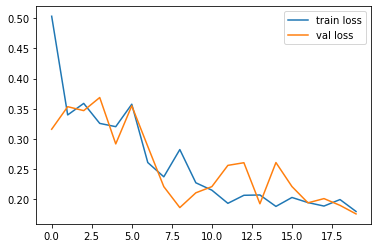

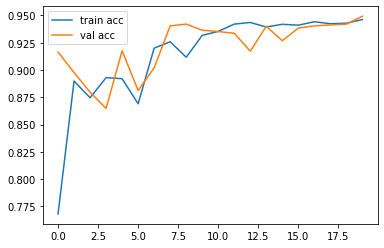

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**Save it as a h5 file**

In [20]:
from tensorflow.keras.models import load_model

cnn.save('model_cnn_malaria.h5')

Apply model on test set

In [21]:
y_pred = cnn.predict(test_set)

In [22]:
y_pred

array([[9.9991989e-01, 8.0066311e-05],
       [9.9201375e-01, 7.9863109e-03],
       [9.9999571e-01, 4.3332607e-06],
       ...,
       [9.9418620e-03, 9.9005812e-01],
       [9.9999785e-01, 2.1937378e-06],
       [9.8316759e-01, 1.6832409e-02]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [25]:
model=load_model('model_cnn_malaria.h5')

In [27]:
img=image.load_img('/content/drive/MyDrive/Malaria/Test/Paracitized/C100P61ThinF_IMG_20150918_144104_cell_162.png',target_size=(224,224))

In [28]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [29]:
x.shape

(224, 224, 3)

In [30]:
x=x/255

In [31]:
import numpy as np
x=np.expand_dims(x,axis=0)
result = model.predict(x)

In [32]:
result

array([[9.9999285e-01, 7.1919594e-06]], dtype=float32)

In [33]:
a=np.argmax(model.predict(x), axis=1)
a

array([0])

In [34]:
if(a==0):
    print("affected")
else:
    print("Uninfected")

affected
